# Web Scraping for Reddit & Predicting Comments

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results

In [1]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
url1 = requests.get('https://www.reddit.com/r/popular/',  headers = {'User-agent': 'your custom agent here'})
url2 = requests.get('https://www.reddit.com/r/popular/?count=25&after=t3_7ys9xj',  headers = {'User-agent': 'your custom agent here'})
url3 = requests.get('https://www.reddit.com/r/popular/?count=50&after=t3_7ypuho',  headers = {'User-agent': 'your custom agent here'})
url4 = requests.get('https://www.reddit.com/r/popular/?count=75&after=t3_7ys3rc',  headers = {'User-agent': 'your custom agent here'})
url5 = requests.get('https://www.reddit.com/r/popular/?count=100&after=t3_7ypvet',  headers = {'User-agent': 'your custom agent here'})
url6 = requests.get('https://www.reddit.com/r/popular/?count=125&after=t3_7yp404',  headers = {'User-agent': 'your custom agent here'})
url7 = requests.get('https://www.reddit.com/r/popular/?count=150&after=t3_7ysmnb',  headers = {'User-agent': 'your custom agent here'})
url8 = requests.get('https://www.reddit.com/r/popular/?count=175&after=t3_7yso22',  headers = {'User-agent': 'your custom agent here'})
url9 = requests.get('https://www.reddit.com/r/popular/?count=200&after=t3_7ysplt',  headers = {'User-agent': 'your custom agent here'})
url10 = requests.get('https://www.reddit.com/r/popular/?count=225&after=t3_7youvx',  headers = {'User-agent': 'your custom agent here'})
url11 = requests.get('https://www.reddit.com/r/popular/?count=250&after=t3_7yrh0w',  headers = {'User-agent': 'your custom agent here'})
url12 = requests.get('https://www.reddit.com/r/popular/?count=275&after=t3_7yn6y0',  headers = {'User-agent': 'your custom agent here'})
url13 = requests.get('https://www.reddit.com/r/popular/?count=300&after=t3_7yrb55',  headers = {'User-agent': 'your custom agent here'})
url14 = requests.get('https://www.reddit.com/r/popular/?count=325&after=t3_7yna4v',  headers = {'User-agent': 'your custom agent here'})
url15 = requests.get('https://www.reddit.com/r/popular/?count=350&after=t3_7yr0uh',  headers = {'User-agent': 'your custom agent here'})
url16 = requests.get('https://www.reddit.com/r/popular/?count=375&after=t3_7yrlul',  headers = {'User-agent': 'your custom agent here'})
url17 = requests.get('https://www.reddit.com/r/popular/?count=400&after=t3_7ypz6y',  headers = {'User-agent': 'your custom agent here'})
url18 = requests.get('https://www.reddit.com/r/popular/?count=425&after=t3_7yobje',  headers = {'User-agent': 'your custom agent here'})
url19 = requests.get('https://www.reddit.com/r/popular/?count=450&after=t3_7yq35q',  headers = {'User-agent': 'your custom agent here'})
url20 = requests.get('https://www.reddit.com/r/popular/?count=475&after=t3_7yprd5',  headers = {'User-agent': 'your custom agent here'})
url21 = requests.get('https://www.reddit.com/r/popular/?count=500&after=t3_7yn1np',  headers = {'User-agent': 'your custom agent here'})
url22 = requests.get('https://www.reddit.com/r/popular/?count=525&after=t3_7yne5z',  headers = {'User-agent': 'your custom agent here'})
url23 = requests.get('https://www.reddit.com/r/popular/?count=550&after=t3_7ysio7',  headers = {'User-agent': 'your custom agent here'})
url24 = requests.get('https://www.reddit.com/r/popular/?count=575&after=t3_7yo4aa',  headers = {'User-agent': 'your custom agent here'})
url25 = requests.get('https://www.reddit.com/r/popular/?count=600&after=t3_7yml1n',  headers = {'User-agent': 'your custom agent here'})

In [ ]:
url26 = requests.get('https://www.reddit.com/r/popular/?count=625&after=t3_7ymo0r',  headers = {'User-agent': 'your custom agent here'})
url27 = requests.get('https://www.reddit.com/r/popular/?count=650&after=t3_7yncwl',  headers = {'User-agent': 'your custom agent here'})
url28 = requests.get('https://www.reddit.com/r/popular/?count=675&after=t3_7yn4ic',  headers = {'User-agent': 'your custom agent here'})

In [ ]:
now = [] # appending request objects
now.append(url1)
now.append(url2)
now.append(url3)
now.append(url4)
now.append(url5)
now.append(url6)
now.append(url7)
now.append(url8)
now.append(url9)
now.append(url10)
now.append(url11)
now.append(url12)
now.append(url13)
now.append(url14)
now.append(url15)
now.append(url16)
now.append(url17)
now.append(url18)
now.append(url19)
now.append(url20)
now.append(url21)
now.append(url22)
now.append(url23)
now.append(url24)
now.append(url25)
now.append(url26)
now.append(url27)
now.append(url28)

In [ ]:
len(now)

In [ ]:
print(now)

In [ ]:
empt_list = []

for each in now:
    BeautifulSoup(each.text, 'lxml')
    empt_list.append(BeautifulSoup(each.text, 'lxml'))
    

In [ ]:
bran_list1 = []  # this cleans the parsed titles
for each in empt_list:
    temp = each.find_all('a', attrs={'data-event-action':'title'})
    # iterate through temp
    # convert using .text
    # add to your final quotes list!
    for result in temp:
        print(result.text)
        bran_list1.append(result.text)

In [ ]:
bran_list2 = []  # this cleans the parsed comments
for each in empt_list:
    temp = each.find_all('a', attrs={'data-event-action':'comments'})
    for result in temp:
        print(result.text)
        bran_list2.append(result.text.split()[0])

In [ ]:
bran_list3 = []   # this cleans the parsed time
for each in empt_list:
    temp = each.find_all('time', attrs={'class':'live-timestamp'})
    for result in temp:
        print(result.text)
        bran_list3.append(result.text.split()[0])

In [ ]:
bran_list4 = []  # this cleans the parsed subreddit
for each in empt_list:
    temp = each.find_all('a', attrs={'class':'subreddit hover may-blank'})
    for result in temp:
        print(result.text)
        bran_list4.append(result.text.split('r/')[1])

In [ ]:
column1 = ['title']  # creating a column name for each varible
df1 = pd.DataFrame(bran_list1)  # converting list to df
df1.columns = column1  # variable name assigned

column2 = ['comments']  # creating a column name for each varible
df2 = pd.DataFrame(bran_list2)   # converting list to df
df2.columns = column2  # variable name assigned

column3 = ['time']  # creating a column name for each varible
df3 = pd.DataFrame(bran_list3)  # converting list to df
df3.columns = column3  # variable name assigned

column4 = ['subreddit']  # creating a column name for each varible
df4 = pd.DataFrame(bran_list4)  # converting list to df
df4.columns = column4  # variable name assigned

In [ ]:
df02 =pd.concat([df1,df2,df3,df4], axis = 1)  # concating list of of varibles already cleaned by column 

df11 = pd.DataFrame(data=df02)  # converting the new concated ndarray to df

In [ ]:
df11.head() # checking the new df before adding them to the row of the already df and save

In [ ]:
df00 = pd.concat([df11, df], axis = 0)  # this concat to rows of the already established df to add more observations to our df

In [ ]:
df00.to_csv("reddit.csv", encoding='utf-8', index=False)  # this code saves our data to a csv file

In [ ]:
df = pd.read_csv("reddit.csv")  # reading the csv file and saving to a df variable

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The thread title is within an `<a>` tag with the attribute `data-event-action="title"`.
- The time since the thread was created is within a `<time>` tag with attribute `class="live-timestamp"`.
- The subreddit is within an `<a>` tag with the attribute `class="subreddit hover may-blank"`.
- The number of comments is within an `<a>` tag with the attribute data-event-action="comments"`.

## Write 4 functions to extract these items (one function for each): title, time, subreddit, and number of comments.¶
Example
```python
def extract_title_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [ ]:
## YOUR CODE HERE
empt_list = []

for each in now:
    BeautifulSoup(each.text, 'lxml')
    empt_list.append(BeautifulSoup(each.text, 'lxml'))
    

In [ ]:
bran_list1 = []  # this cleans the parsed titles
for each in empt_list:
    temp = each.find_all('a', attrs={'data-event-action':'title'})
    # iterate through temp
    # convert using .text
    # add to your final quotes list!
    for result in temp:
        print(result.text)
        bran_list1.append(result.text)
        
bran_list2 = []  # this cleans the parsed comments
for each in empt_list:
    temp = each.find_all('a', attrs={'data-event-action':'comments'})
    for result in temp:
        print(result.text)
        bran_list2.append(result.text.split()[0])
        
bran_list3 = []   # this cleans the parsed time
for each in empt_list:
    temp = each.find_all('time', attrs={'class':'live-timestamp'})
    for result in temp:
        print(result.text)
        bran_list3.append(result.text.split()[0])
        
bran_list4 = []  # this cleans the parsed subreddit
for each in empt_list:
    temp = each.find_all('a', attrs={'class':'subreddit hover may-blank'})
    for result in temp:
        print(result.text)
        bran_list4.append(result.text.split('r/')[1])

Now, to scale up our scraping, we need to accumulate more results.

First, look at the source of a Reddit.com page: (https://www.reddit.com/).
Try manually changing the page by clicking the 'next' button on the bottom. Look at how the url changes.

After leaving the Reddit homepage, the URLs should look something like this:
```
https://www.reddit.com/?count=25&after=t3_787ptc
```

The URL here has two query parameters
- count is the result number that the page starts with
- after is the unique id of the last result on the _previous_ page

In order to scrape lots of pages from Reddit, we'll have to change these parameters every time we make a new request so that we're not just scraping the same page over and over again. Incrementing the count by 25 every time will be easy, but the bizarre code after `after` is a bit trickier.

To start off, let's look at a block of HTML from a Reddit page to see how we might solve this problem:
```html
<div class=" thing id-t3_788tye odd gilded link " data-author="LordSneaux" data-author-fullname="t2_j3pty" data-comments-count="1548" data-context="listing" data-domain="v.redd.it" data-fullname="t3_788tye" data-kind="video" data-num-crossposts="0" data-permalink="/r/funny/comments/788tye/not_all_heroes_wear_capes/" data-rank="25" data-score="51468" data-subreddit="funny" data-subreddit-fullname="t5_2qh33" data-timestamp="1508775581000" data-type="link" data-url="https://v.redd.it/ush0rh2tultz" data-whitelist-status="all_ads" id="thing_t3_788tye" onclick="click_thing(this)">
      <p class="parent">
      </p>
      <span class="rank">
       25
      </span>
      <div class="midcol unvoted">
       <div aria-label="upvote" class="arrow up login-required access-required" data-event-action="upvote" role="button" tabindex="0">
       </div>
       <div class="score dislikes" title="53288">
        53.3k
       </div>
       <div class="score unvoted" title="53289">
        53.3k
       </div>
       <div class="score likes" title="53290">
        53.3k
       </div>
       <div aria-label="downvote" class="arrow down login-required access-required" data-event-action="downvote" role="button" tabindex="0">
       </div>
      </div>
```

Notice that within the `div` tag there is an attribute called `id` and it is set to `"thing_t3_788tye"`. By finding the last ID on your scraped page, you can tell your _next_ request where to start (pass everything after "thing_").

For more info on this, you can take a look at the [Reddit API docs](https://github.com/reddit/reddit/wiki/JSON)

## Write one more function that finds the last `id` on the page, and stores it.

In [ ]:
## YOUR CODE HERE
url1 = requests.get('https://www.reddit.com/r/popular/?count=650&after=t3_7ybd3i',  headers = {'User-agent': 'your custom agent here'})

## Now, let's put it all together.

Use the functions you wrote above to parse out the 4 fields - title, time, subreddit, and number of comments. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE

In [ ]:
column1 = ['title']  # creating a column name for each varible
df1 = pd.DataFrame(bran_list1)  # converting list to df
df1.columns = column1  # variable name assigned

column2 = ['comments']  # creating a column name for each varible
df2 = pd.DataFrame(bran_list2)   # converting list to df
df2.columns = column2  # variable name assigned

column3 = ['time']  # creating a column name for each varible
df3 = pd.DataFrame(bran_list3)  # converting list to df
df3.columns = column3  # variable name assigned

column4 = ['subreddit']  # creating a column name for each varible
df4 = pd.DataFrame(bran_list4)  # converting list to df
df4.columns = column4  # variable name assigned


df02 =pd.concat([df1,df2,df3,df4], axis = 1)  # concating list of of varibles already cleaned by column 

df11 = pd.DataFrame(data=df02)  # converting the new concated ndarray to df

#df00 = pd.concat([df11, df1], axis = 0)  # this concat to rows of the already established df to add more observations to our df

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [ ]:
# Export to csv
df00.to_csv("reddit.csv", encoding='utf-8', index=False)  # this code saves our data to a csv file

df.to_csv("reddit.csv", encoding='utf-8', index=False)

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [385]:
## YOUR CODE HERE
df = pd.read_csv("reddit.csv")  # reading the csv file and saving to a df variable
df.drop(['yes_no','new_variable'], axis=1, inplace=True)

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [386]:
df = df[df.duplicated(['title'], keep='first')].copy() # getting rid of duplicates

In [387]:
df.reset_index()
df = df.reset_index(drop=True) # reseting index

In [388]:
df.head() # previewing DataFrame

,comments,minutes,subreddit,time,title
0,210.0,720.0,dontdeadopeninside,12,"Why did I name my show ""THE JOEL WITH McHALE J..."
1,77.0,540.0,curlyhai,9,Very good curly hair day
2,435.0,540.0,NintendoSwitch,9,The recent DOOM patch added motion controls! R...
3,40.0,480.0,memes,8,Time heals all wounds
4,39.0,780.0,BlackPeopleTwitte,13,Baby come back


In [389]:
## YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 5 columns):
comments     1154 non-null float64
minutes      1154 non-null float64
subreddit    1154 non-null object
time         1154 non-null int64
title        1154 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 45.2+ KB


In [ ]:
df['comments'] = df.comments.str.extract('(\d+)', expand = True).astype(float)  # setting comment dtype to float

In [ ]:
null_com_mask = df['comments'].isnull()  # setting null values to 0
df.loc[null_com_mask, 'comments'] = 0

In [ ]:
new_nu = df['subreddit']# striping the subreddit strings (r/)
new_nul = new_nu.str.strip('r/')
df['subreddit'] = new_nul

In [390]:
df['comments'].median()  # median value for comments variable

77.0

In [417]:
df['yes_no'] = df['comments'] >= 77.0  # creating a binary column

In [418]:
df['yes_no'] = df['yes_no'].map(lambda x: 1 if x == True else 0)   # classification prediction

In [ ]:
df['minutes'] = (df['time']*60).astype(float)  # convert time from hours to minutes

In [419]:
df.yes_no.value_counts()

1    580
0    574
Name: yes_no, dtype: int64

In [420]:
df.sort_values(by=['comments'], ascending=False).head(3)   # titles with most number of comments(viral)

,comments,minutes,subreddit,time,title,yes_no
703,11699.0,600.0,AskReddit,10,American gun owners of Reddit who have moved t...,1
724,7190.0,420.0,AskReddit,7,What are some common signs that a person is to...,1
962,3458.0,720.0,AskReddit,12,What is the dumbest activity you are enjoying ...,1


In [421]:
df.sort_values(by=['comments'], ascending=True).head(5)  # titles with the leaste number of comments

,comments,minutes,subreddit,time,title,yes_no
805,0.0,180.0,tuckedinkitties,3,This is his sleepy glare when I turn the light on,0
165,0.0,1140.0,UNBGBBIIVCHIDCTIICBG,19,Smooth AF.,0
796,2.0,360.0,BlackPeopleTwitte,6,"""Don't get excited, just here to grab a water ...",0
814,2.0,240.0,curledfeetsies,4,B having a little nap,0
1084,2.0,120.0,Atlanta,2,TERMINIX scamming ATL,0


In [422]:
df.sort_values(by=['time'], ascending=False).head(5) # titles with most posting time

,comments,minutes,subreddit,time,title,yes_no
109,977.0,1320.0,OldSchoolCool,22,Detroit - 1973,1
124,608.0,1320.0,BlackPeopleTwitte,22,Sweet home Alabama,1
131,1108.0,1320.0,Futurology,22,Infection outbreaks at hospitals could be redu...,1
149,608.0,1320.0,BlackPeopleTwitte,22,Sweet home Alabama,1
166,444.0,1260.0,Wellthatsucks,21,I tried to add almond milk to my coffee this m...,1


In [426]:
# This threads shows tendency of going viral considering they are still under an hour of post time
df.sort_values(by=['time'], ascending=True).head(5)  # titles with least posting time

,comments,minutes,subreddit,time,title,yes_no
713,25.0,60.0,Prematurecelebration,1,\o/,0
879,16.0,60.0,standupshots,1,1 out of 10,0
921,50.0,60.0,CollegeBasketball,1,"This one’s for you, /r/collegebasketball.",0
947,108.0,60.0,DIY,1,I made high-end XLR cables,1
1044,21.0,60.0,bigboye,1,Florida potato dogs welcoming a friend to the ...,0


In [396]:
len(df)

1154

In [397]:
from nltk.tokenize import word_tokenize

In [427]:
count_array = [len(word_tokenize(line)) >= 34 for line in df['title']]
longer_than_5_df = df[count_array]  # sentences with words greater than 34
longer_than_5_df.head(2)

,comments,minutes,subreddit,time,title,yes_no
19,646.0,540.0,Futurology,9,Trump Can’t Save Coal: More Capacity Closed Al...,1
21,474.0,900.0,DnD,15,[ART] My wizard was killed by a crit from Wyve...,1


In [428]:
count_arr = [len(word_tokenize(line)) for line in df['title']]

In [429]:
count_arr[0]  # tokenized df

16

In [430]:
count_array1 = [len(word_tokenize(line)) <=33  for line in df['title']]
longer_than_5_df1 = df[count_array1] # threads with word less than or equal to 30
longer_than_5_df1.head(2)

,comments,minutes,subreddit,time,title,yes_no
0,210.0,720.0,dontdeadopeninside,12,"Why did I name my show ""THE JOEL WITH McHALE J...",1
1,77.0,540.0,curlyhai,9,Very good curly hair day,1


In [431]:
longer_than_5_df1['comments'].mean()  # threads with less or equal to 33 words comment Average

234.0

In [432]:
longer_than_5_df['comments'].mean()  # sentences with greater than or equal to 34 words comment Averages

373.73846153846154

In [435]:
titles_wmc = df.sort_values(by=['comments'], ascending = False).head(100)   # title threads with most comments
titles_wmc.head(3)

,comments,minutes,subreddit,time,title,yes_no
703,11699.0,600.0,AskReddit,10,American gun owners of Reddit who have moved t...,1
724,7190.0,420.0,AskReddit,7,What are some common signs that a person is to...,1
962,3458.0,720.0,AskReddit,12,What is the dumbest activity you are enjoying ...,1


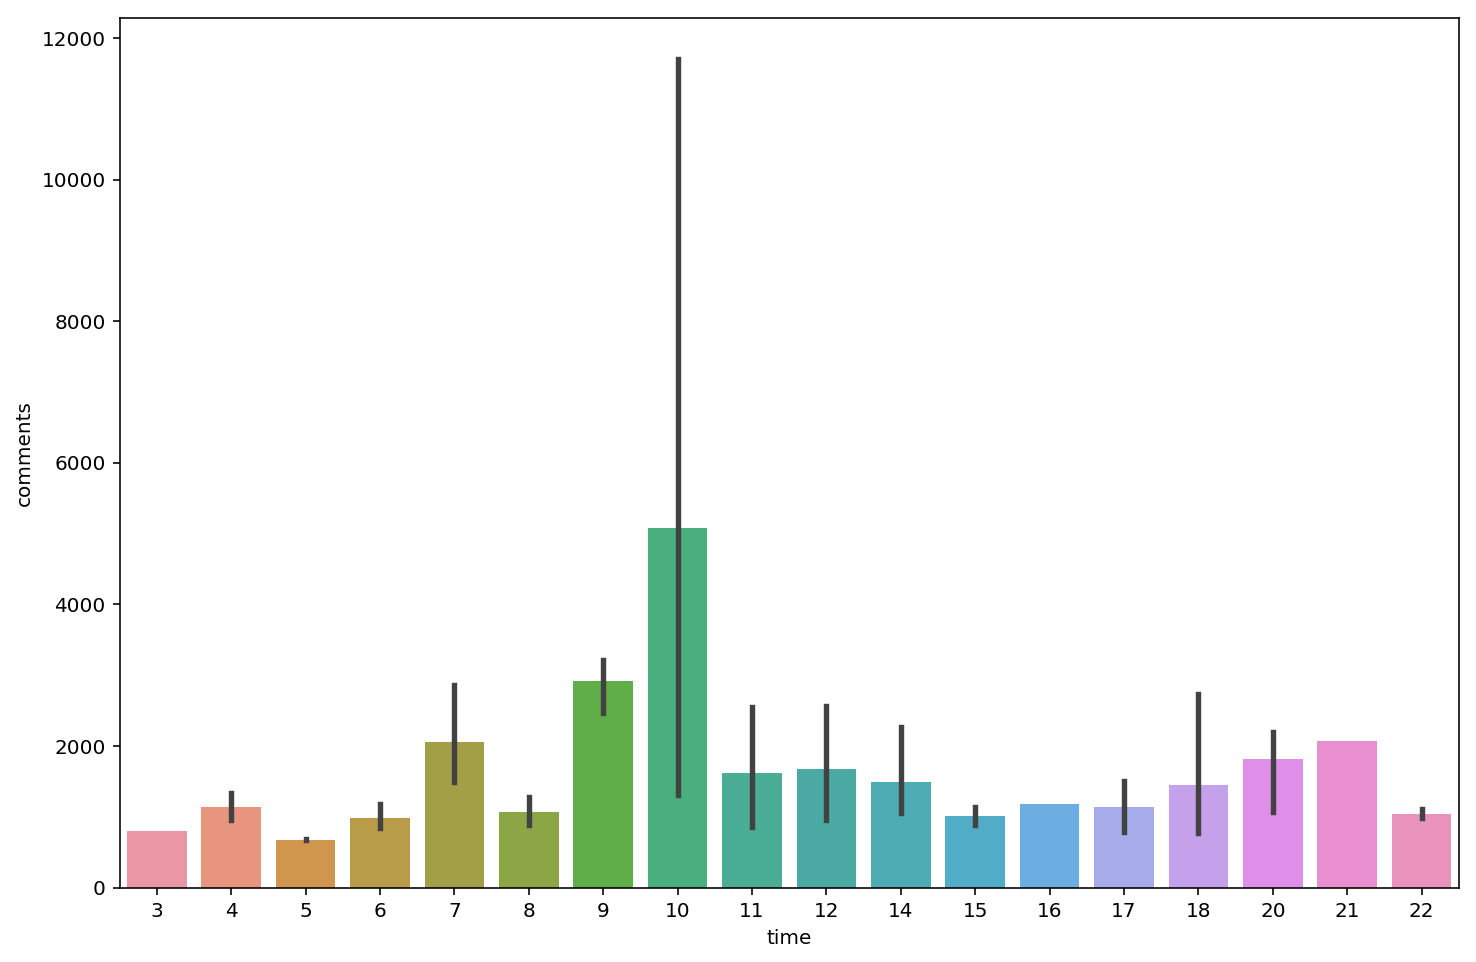

In [471]:
# A barplot of threads with most comments against time frame.
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='time', y='comments', data=titles_wmc,  ax=ax)

In [472]:
len(df)

1154

In [ ]:
df[df['subreddit'] == 'AskReddit']

In [473]:
title_wlc = df.sort_values(by=['comments'], ascending = True).head(100) # title threads with least comments
title_wlc['comments'].mean()  # first 100 threads average comment

7.82

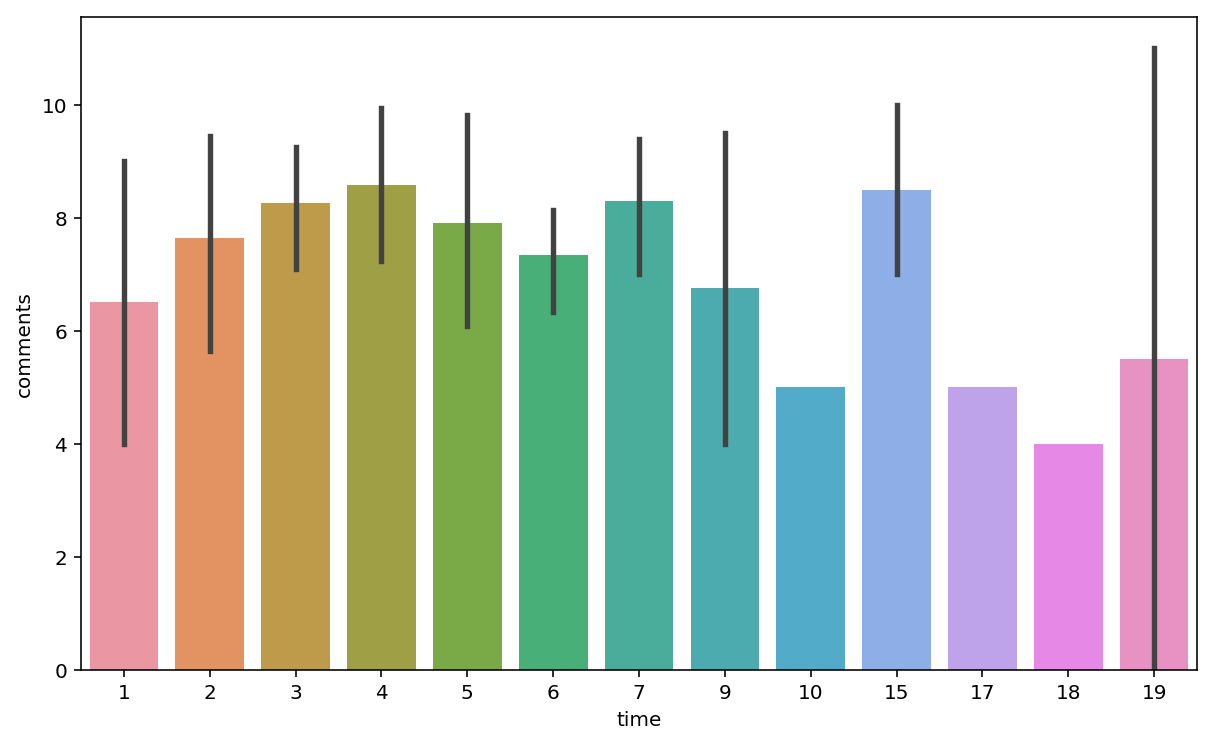

In [474]:
# A barplot of threads with least comments against time frame.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='time', y='comments', data=title_wlc,  ax=ax)

In [409]:
df[df['title'] == 'American gun owners of Reddit who have moved to a country with strict gun-control, what has this been like, what are the differences?']

,comments,minutes,subreddit,time,title
703,11699.0,600.0,AskReddit,10,American gun owners of Reddit who have moved t...


In [410]:
newly = longer_than_5_df[['comments','title']].sort_values(by='comments',ascending=False)

In [411]:
newly1 = newly[newly.duplicated(['title'], keep='first')].copy()  # sentences with words greater than 34

In [412]:
len(newly1)

23

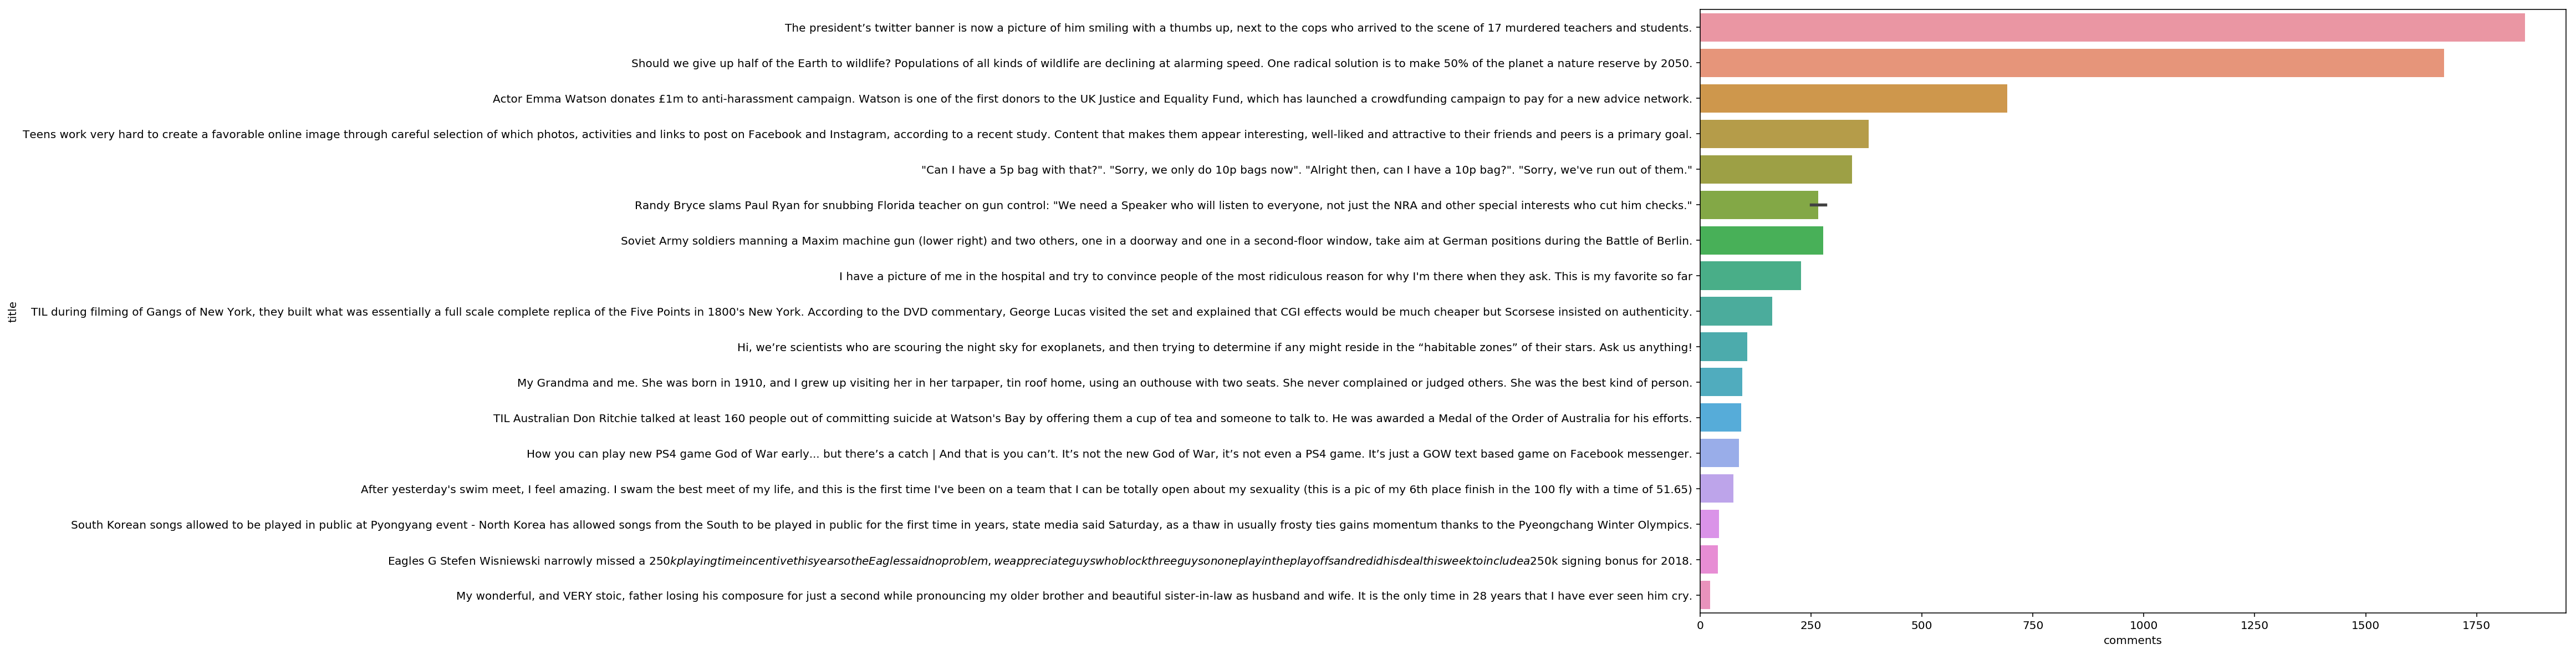

In [413]:
# A barplot of sentences with words greater than 34 against comments.
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x=newly1['comments'], y=newly1['title'], data=newly1,  ax=ax)

In [414]:
# threads with word less than or equal to 30
newlyy = longer_than_5_df1[['comments','title']].sort_values(by='comments',ascending=False)  

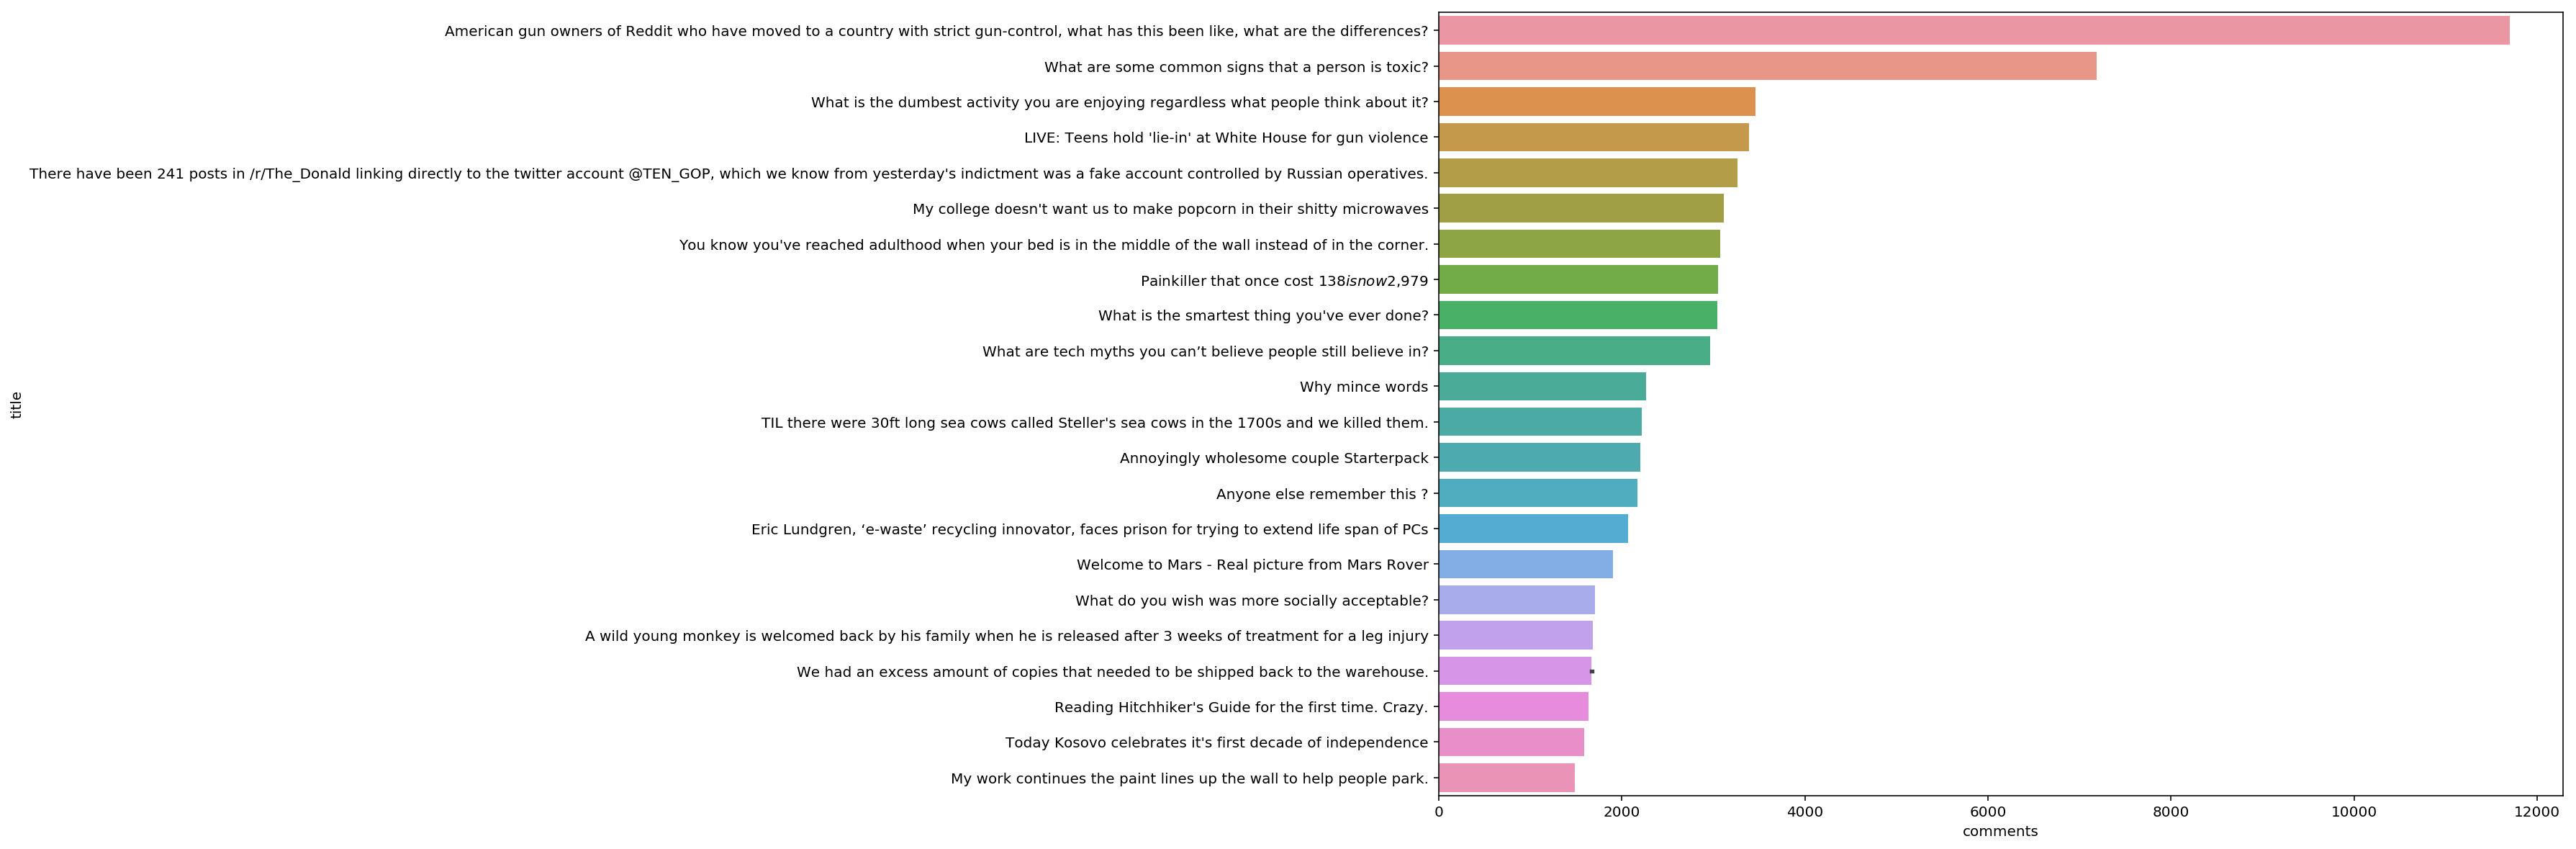

In [415]:
# A barplot of sentences with word less than or equal to 30 against comments.
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x=newlyy['comments'][0:30], y=newlyy['title'][0:30], data=newlyy,  ax=ax)

#### Thought experiment: What is the baseline accuracy for this model?

In [475]:
## YOUR CODE HERE
y = df['yes_no']
y.value_counts()/len(y)   # baseline accuracy

1    0.5026
0    0.4974
Name: yes_no, dtype: float64

In [ ]:
# baseline is ~50% (proportion of majority class: rank 1)
# we have relatively balanced classes.

In [476]:
df.notnull().sum() # checking for null values

comments     1154
minutes      1154
subreddit    1154
time         1154
title        1154
yes_no       1154
dtype: int64

#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [744]:
## YOUR CODE HERE
X = df['subreddit']  # assigning predictor
y = df.yes_no.values  # assigning response variable

In [745]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [746]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(577,) (577,)
(577,) (577,)


In [747]:
Xs_train = X_train.apply(lambda x: x.lower())
Xs_test = X_test.apply(lambda x: x.lower())

In [748]:
Xs_train[0:5]

326           funny
163      fortnitebr
324         madlads
627          trashy
1092    nottheonion
Name: subreddit, dtype: object

In [749]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate my vectorizer and fit it on the training data
# I'm adding stopwords so my count vectorizer doesn't look at words like is, at, the, etc.
cv = CountVectorizer()
cv.fit(Xs_train)  # fitting the model to the training data set

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [750]:
# use len(cv.get_feature_names() to determine how many features there are)
len(cv.get_feature_names())

272

In [751]:
# already stored a new variable Xs_train to store my lowercased data

# 1. cv.transform(Xs_train) -- check that I get back a sparse matrix
# 2. cv.transform(Xs_train).todense() -- check that I get back an appropriate-looking matrix
# 3. pd.DataFrame(cv.transform(X_train)) -- check that it converts to a dataframe without errors
# 4. pd.DataFrame(cv.transform(X_train), columns=cv.get_feature_names()) -- add column names!
Xs_train = pd.DataFrame(cv.transform(Xs_train).todense(), columns=cv.get_feature_names())  #train data set

In [752]:
Xs_train.head(3)

,2healthbars,2meirl4meirl,4panelcringe,absolutelynotme_irl,absolutelynotmeirl,accidentalwesanderson,animalcrossing,anime_irl,antimlm,archerfx,...,wholesomememes,woahdude,wokekids,woof_irl,worldnews,wwii,youseecomrade,youshouldknow,zelda,zoomies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [753]:
# Now I want to use test data. I'll need to transform my test data the same way I transformed my train data
Xs_test = pd.DataFrame(cv.transform(Xs_test).todense(), columns=cv.get_feature_names())  # test data set

In [754]:
print(Xs_train.shape)
print(Xs_test.shape)

(577, 272)
(577, 272)


In [755]:
Xs_train.sum().sort_values(ascending=False).head(3)

aww      26
pics     21
funny    17
dtype: int64

In [756]:
rand = RandomForestClassifier(random_state=2018)  # instanciating RandomForestClissifier model
rand.fit(Xs_train, y_train) # fiting the model to the tarining data set

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [757]:
feature = rand.feature_importances_ # checking feature importance
feature[0:5]

array([ 0.00171733,  0.00385483,  0.0008897 ,  0.00090353,  0.00074192])

In [758]:
# predictions
pred_new = rand.predict(Xs_test)
pred_new[0:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [759]:
rand.score(Xs_test, y_test)

0.66897746967071059

In [760]:
rand.score(Xs_train, y_train)

0.85095320623916815

In [761]:
# creating a dataframe of true observations, predictions and features importance
pred = pd.DataFrame(list(zip(cv.get_feature_names(), feature, y_test, pred_new)),
                         columns=['word','feature_importance','True_value', 'Prediction']) 

In [762]:
pred.head()  # previewing prediction

,word,feature_importance,True_value,Prediction
0,2healthbars,0.001717,0,0
1,2meirl4meirl,0.003855,1,1
2,4panelcringe,0.000890,0,0
3,absolutelynotme_irl,0.000904,1,0
4,absolutelynotmeirl,0.000742,0,1


In [763]:
pred.sort_values(by=['feature_importance'], ascending=False).head(10)  # first features with high importance

,word,feature_importance,True_value,Prediction
17,atlanta,0.023705,0,1
101,funny,0.017110,1,1
13,askreddit,0.016885,1,1
19,aww,0.015819,1,1
107,gaming,0.015074,1,0
11,art,0.011774,0,1
25,beamazed,0.011512,1,1
97,fortnitebr,0.010949,0,0
226,sweden,0.010822,1,0
262,wholesomememes,0.010605,1,1


In [764]:
predss = pred.sort_values(by=['feature_importance'], ascending=False)

In [765]:
predss.head(2)

,word,feature_importance,True_value,Prediction
17,atlanta,0.023705,0,1
101,funny,0.017110,1,1


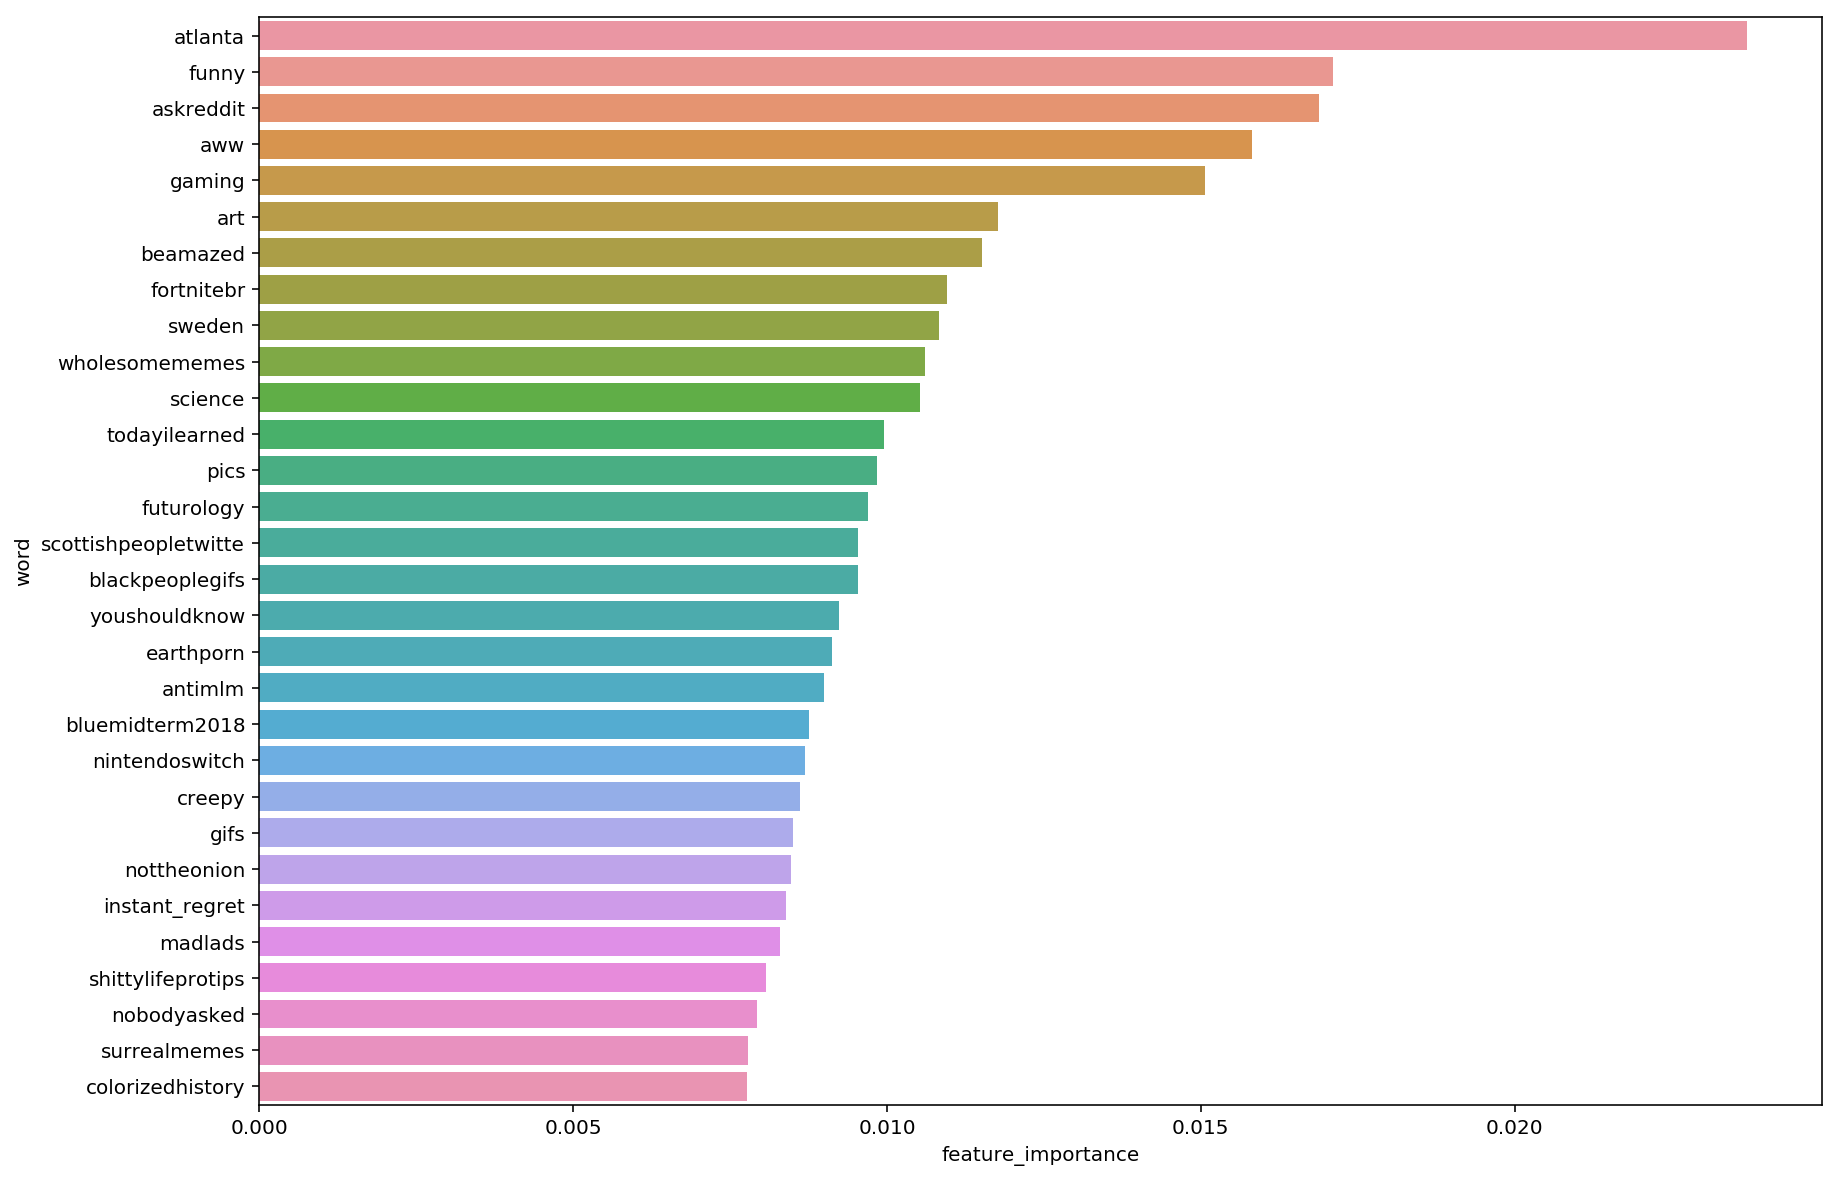

In [766]:
# A barplot of word and their importance to the thread going viral.
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x=predss['feature_importance'][0:30], y=predss['word'][0:30], data=predss,  ax=ax)

In [767]:
pred.True_value.value_counts()

1    144
0    128
Name: True_value, dtype: int64

In [768]:
pred.Prediction.value_counts()

0    148
1    124
Name: Prediction, dtype: int64

In [769]:
from sklearn.metrics import confusion_matrix

In [770]:
pd.crosstab(pred['True_value'], pred['Prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,93,35,128
1,55,89,144
All,148,124,272


#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [126]:
## YOUR CODE HERE
#df2 = pd.read_csv("reddit.csv")  # reading the csv file and saving to a df variable


In [ ]:
#count_arr = [len(word_tokenize(line)) for line in df['title']]
#count_arr


In [772]:
first_10 = df.sort_values(by='comments', ascending = False).head(10) # threads with most comments count

In [773]:
first_10.head(3)

,comments,minutes,subreddit,time,title,yes_no
703,11699.0,600.0,AskReddit,10,American gun owners of Reddit who have moved t...,1
724,7190.0,420.0,AskReddit,7,What are some common signs that a person is to...,1
962,3458.0,720.0,AskReddit,12,What is the dumbest activity you are enjoying ...,1


To understand why the threads with the most interactions averagaes between 19.5 to 7.3 comments per minute based on counts based on comments count. hence learning the contextual and syntactic structure was the obvous thing to do.
So considering the curent climate around the country now i felt it's best to not ignore the word Russia, Donald, Gun, Fake, Indictment and also consider that most of the thread are questions(due to pressence of question marks) so anything could simply be the reason.

In [145]:
#first_10['title'][703]

'American gun owners of Reddit who have moved to a country with strict gun-control, what has this been like, what are the differences?'

In [146]:
#first_10['title'][724]

'What are some common signs that a person is toxic?'

In [147]:
#first_10['title'][962]

'What is the dumbest activity you are enjoying regardless what people think about it?'

In [148]:
#first_10['title'][100]

"LIVE: Teens hold 'lie-in' at White House for gun violence"

In [149]:
#first_10['title'][741]

"There have been 241 posts in /r/The_Donald linking directly to the twitter account @TEN_GOP, which we know from yesterday's indictment was a fake account controlled by Russian operatives."

In [137]:
first_10.title

703     American gun owners of Reddit who have moved t...
724     What are some common signs that a person is to...
962     What is the dumbest activity you are enjoying ...
100     LIVE: Teens hold 'lie-in' at White House for g...
741     There have been 241 posts in /r/The_Donald lin...
26      My college doesn't want us to make popcorn in ...
677     You know you've reached adulthood when your be...
601     You know you've reached adulthood when your be...
1032         Painkiller that once cost $138 is now $2,979
665          What is the smartest thing you've ever done?
Name: title, dtype: object

In [136]:
count_arr1 = [len(word_tokenize(line)) for line in first_10.title]  # first ten threads with most comments andcount of words
count_arr1

[26, 11, 15, 12, 32, 13, 22, 22, 10, 10]

In [774]:
df.shape

(1154, 6)

In [775]:
df.head()

,comments,minutes,subreddit,time,title,yes_no
0,210.0,720.0,dontdeadopeninside,12,"Why did I name my show ""THE JOEL WITH McHALE J...",1
1,77.0,540.0,curlyhai,9,Very good curly hair day,1
2,435.0,540.0,NintendoSwitch,9,The recent DOOM patch added motion controls! R...,1
3,40.0,480.0,memes,8,Time heals all wounds,0
4,39.0,780.0,BlackPeopleTwitte,13,Baby come back,0


In [776]:
#in_it = df.title.apply(lambda x: x.lower().split())

In [777]:
def check(each):  # creating new variables based on if they exist in the thread title
    
    each = each.lower()
    
    if 'gun' in each:
        return 1
    elif 'twitter' in each:
        return 0
    elif 'russia' in each:
        return 2
    elif 'donald' in each:
        return 3
    else:
        return 4

In [778]:
df['new_variable'] = df['title'].apply(check).copy()  # creating new variable

In [779]:
df.new_variable.notnull().sum()  # checking for null values

1154

In [780]:
df.head()

,comments,minutes,subreddit,time,title,yes_no,new_variable
0,210.0,720.0,dontdeadopeninside,12,"Why did I name my show ""THE JOEL WITH McHALE J...",1,4
1,77.0,540.0,curlyhai,9,Very good curly hair day,1,4
2,435.0,540.0,NintendoSwitch,9,The recent DOOM patch added motion controls! R...,1,4
3,40.0,480.0,memes,8,Time heals all wounds,0,4
4,39.0,780.0,BlackPeopleTwitte,13,Baby come back,0,4


In [781]:
df.new_variable.value_counts()  # checking the count of each value of the categorical feature

4    1118
2      16
1      12
0       6
3       2
Name: new_variable, dtype: int64

In [782]:
Xb.head(2)

,subreddit,new_variable
0,dontdeadopeninside,4
1,curlyhai,4


In [783]:
## YOUR CODE HERE
Xb = df[['subreddit', 'new_variable']]
yb = df.yes_no.values

In [784]:
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.5)
print(X_trainb.shape, y_trainb.shape)
print(X_testb.shape, y_testb.shape)

(577, 2) (577,)
(577, 2) (577,)


In [785]:
Xs_trainb1 = X_trainb['new_variable']   # testing data set
Xs_testb1 = X_testb['new_variable']

In [786]:
Xs_trainb = X_trainb['subreddit'].apply(lambda x: x.lower())  # training data set
Xs_testb = X_testb['subreddit'].apply(lambda x: x.lower())

In [787]:
# instantiate my vectorizer and fit it on the training data
cv1 = CountVectorizer(stop_words='english')
cv1.fit(Xs_trainb)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [788]:
# already stored a new variable Xs_train to store my lowercased data

# 1. cv.transform(Xs_train) -- check that I get back a sparse matrix
# 2. cv.transform(Xs_train).todense() -- check that I get back an appropriate-looking matrix
# 3. pd.DataFrame(cv.transform(X_train)) -- check that it converts to a dataframe without errors
# 4. pd.DataFrame(cv.transform(X_train), columns=cv.get_feature_names()) -- add column names!
Xs_trainb = pd.DataFrame(cv1.transform(Xs_trainb).todense(), columns=cv1.get_feature_names())  #train data set

In [789]:
new = Xs_trainb.copy()  # creating new dataframe

In [790]:
#not_current = pd.concat([not_current,pd.get_dummies(not_current['Royal?'])], axis = 1)

#pd.get_dummies(df['Royal?'])

In [791]:
new['new_f'] = Xs_trainb1.reset_index(drop=True) # joining both training predictors after verctorizing

In [792]:
new_train = new  # training data

In [793]:
new_train.head(2)

,2healthbars,2meirl4meirl,abandonedporn,absolutelynotme_irl,absolutelynotmeirl,accidentalwesanderson,animalsbeingderps,animaltextgifs,anime_irl,anormaldayinrussia,...,worldnews,worldpolitics,writingprompts,wwii,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,new_f
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [794]:
new_train = pd.concat([new_train,pd.get_dummies(new_train['new_f']) ], axis = 1)  # creating dummy variable and concate with
# train data set

In [795]:
new_train.drop('new_f', axis = 1, inplace = True)  # train set ready for fitting

In [796]:
# Now I want to use test data. I'll need to transform my test data the same way I transformed my train data
Xs_testb = pd.DataFrame(cv1.transform(Xs_testb).todense(), columns=cv1.get_feature_names())  # test data set

In [797]:
new_t = Xs_testb.copy()   # creating new dataframe for testing data

In [798]:
new_t['new_f'] = Xs_testb1.reset_index(drop=True)

In [799]:
new_test = new_t

In [800]:
new_test.head(2)   # testing data set

,2healthbars,2meirl4meirl,abandonedporn,absolutelynotme_irl,absolutelynotmeirl,accidentalwesanderson,animalsbeingderps,animaltextgifs,anime_irl,anormaldayinrussia,...,worldnews,worldpolitics,writingprompts,wwii,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,new_f
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [801]:
new_test = pd.concat([new_test,pd.get_dummies(new_test['new_f']) ], axis = 1)  # creating dummy variable and concate with
# test data set

In [802]:
new_test.drop('new_f', axis = 1, inplace = True)  # train set ready for scoring

In [803]:
# Xs_trainb.sum().sort_values(ascending=False).head(3)

In [804]:
rand1 = RandomForestClassifier(random_state=2018)  # instanciating RandomForestClissifier model
rand1.fit(new_train, y_trainb) # fiting the model with the tarining data set

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [805]:
feature1 = rand1.feature_importances_ # checking feature importance
feature1[0:5]

array([ 0.00283858,  0.00401653,  0.00167686,  0.00472108,  0.00137276])

In [806]:
# predictions
pred_new1 = rand1.predict(new_test)
pred_new1[0:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [807]:
rand1.score(new_test, y_testb, sample_weight=None)

0.70017331022530327

In [808]:
# creating a dataframe of true observations, predictions and features importance
pred2 = pd.DataFrame(list(zip(cv1.get_feature_names(), feature1, y_testb, pred_new1)),
                         columns=['word','feature_importance','True_value', 'Prediction']) 

In [809]:
pred2.head() # previewing predictions and feature importances

,word,feature_importance,True_value,Prediction
0,2healthbars,0.002839,1,1
1,2meirl4meirl,0.004017,1,1
2,abandonedporn,0.001677,0,1
3,absolutelynotme_irl,0.004721,0,0
4,absolutelynotmeirl,0.001373,0,0


In [810]:
pred2.sort_values(by=['feature_importance'], ascending=False).head(4) # top four important features

,word,feature_importance,True_value,Prediction
98,gaming,0.027666,1,1
17,atlanta,0.022178,0,0
225,todayilearned,0.018929,1,1
14,askreddit,0.011033,0,0


In [811]:
pr22 = pred2.sort_values(by=['feature_importance'], ascending=False)

In [812]:
pr22.head(2)

,word,feature_importance,True_value,Prediction
98,gaming,0.027666,1,1
17,atlanta,0.022178,0,0


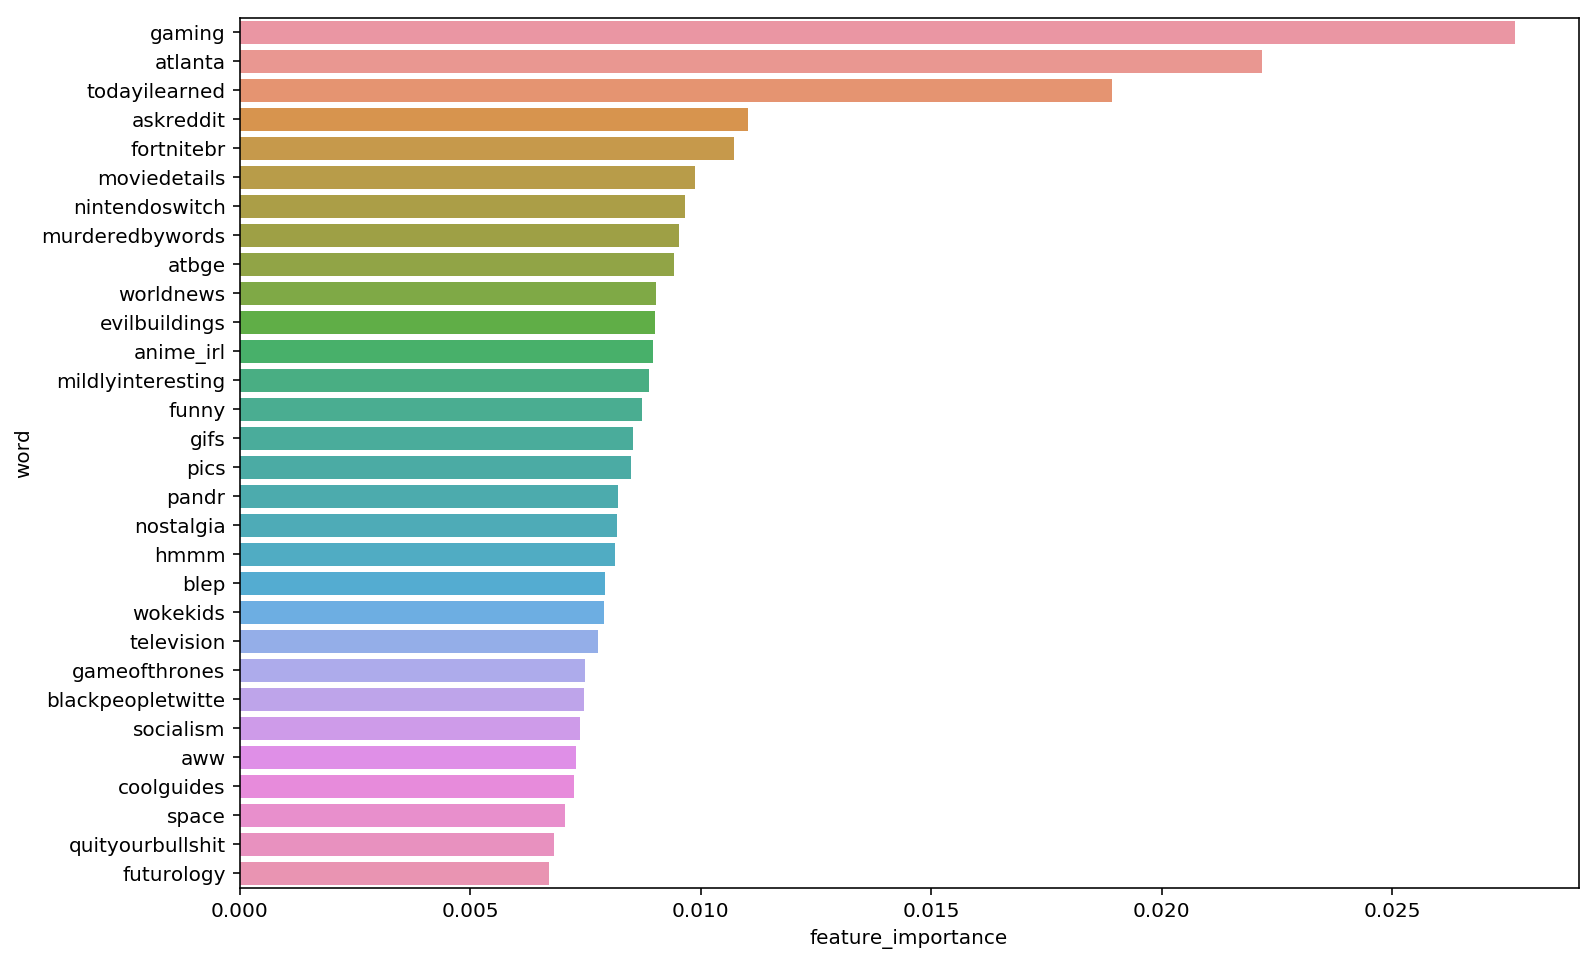

In [814]:
# A barplot of word and their importance to the thread going viral.
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=pr22['feature_importance'][0:30], y=pr22['word'][0:30], data=pr22,  ax=ax)

In [815]:
pred2.True_value.value_counts()

1    133
0    125
Name: True_value, dtype: int64

In [816]:
pred2.Prediction.value_counts()

0    155
1    103
Name: Prediction, dtype: int64

In [ ]:
df.head()

In [817]:
## YOUR CODE HERE   # using count-vectorizer to create features based on the words in the thread titles
Xt = df['title'].apply(lambda x: x.lower())
yt = df.yes_no.values

In [818]:
X_traint, X_testt, y_traint, y_testt = train_test_split(Xt, yt, test_size=0.5)
print(X_traint.shape, y_traint.shape)
print(X_testt.shape, y_testt.shape)

(577,) (577,)
(577,) (577,)


In [819]:
#X_traint = X_traint.apply(lambda x: x.lower())  # training data set
#X_testt = X_testt.apply(lambda x: x.lower())

In [820]:
# instantiate my vectorizer and fit it on the training data
cv2 = CountVectorizer(stop_words='english')
cv2.fit(X_traint)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [821]:
# already stored a new variable Xs_train to store my lowercased data

# 1. cv.transform(Xs_train) -- check that I get back a sparse matrix
# 2. cv.transform(Xs_train).todense() -- check that I get back an appropriate-looking matrix
# 3. pd.DataFrame(cv.transform(X_train)) -- check that it converts to a dataframe without errors
# 4. pd.DataFrame(cv.transform(X_train), columns=cv.get_feature_names()) -- add column names!
X_traint = pd.DataFrame(cv2.transform(X_traint).todense(), columns=cv2.get_feature_names())  #train data set

In [822]:
X_traint.head(2)

,000,10,100,1000,1100x1283,1280x720,13,1330,138,14,...,yesterday,young,youtube,ysk,zombie,zones,zoomies,ｃｈｏｏｓｅ,ｆｌａｖｏｕｒ,ｙｏｕｒ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [823]:
train2_new = X_traint.copy()

In [824]:
new_train.head(1)

,2healthbars,2meirl4meirl,abandonedporn,absolutelynotme_irl,absolutelynotmeirl,accidentalwesanderson,animalsbeingderps,animaltextgifs,anime_irl,anormaldayinrussia,...,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,0,1,2,3,4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [825]:
train2_new.head(1)

,000,10,100,1000,1100x1283,1280x720,13,1330,138,14,...,yesterday,young,youtube,ysk,zombie,zones,zoomies,ｃｈｏｏｓｅ,ｆｌａｖｏｕｒ,ｙｏｕｒ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [826]:
train2_new2 = pd.concat([train2_new, new_train], axis= 1, ignore_index=True)

In [827]:
word_train_subreddit_names = train2_new.columns.append(new_train.columns)  # name for train set

In [828]:
train2_new2.columns = word_train_subreddit_names

In [829]:
train2_new2.head(3)  # combine vectorized training data set for fit  (subreddit, title, new_variable)

,000,10,100,1000,1100x1283,1280x720,13,1330,138,14,...,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,0,1,2,3,4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [830]:
train2_new2.columns  # trainign data set column names

Index([          '000',            '10',           '100',          '1000',
           '1100x1283',      '1280x720',            '13',          '1330',
                 '138',            '14',
       ...
       'youseecomrade', 'youshouldknow',  'youtubehaiku',         'zelda',
             'zoomies',               0,               1,               2,
                     3,               4],
      dtype='object', length=2130)

In [831]:
X_testt = pd.DataFrame(cv2.transform(X_testt).todense(), columns=cv2.get_feature_names())  # test data set

In [832]:
test2_new = X_testt.copy()  # vectorize title test data set befor combine with two other test variables

In [833]:
word_and_subreddit_names = test2_new.columns.append(new_test.columns)

In [834]:
test2_new2 = pd.concat([test2_new,new_test], axis=1, ignore_index=True)

In [835]:
test2_new2.columns = word_and_subreddit_names

In [836]:
test2_new2.head(2)  # combined vectorized testing data for (subreddit, title, new_variable)

,000,10,100,1000,1100x1283,1280x720,13,1330,138,14,...,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,0,1,2,3,4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [837]:
randt = RandomForestClassifier(random_state=2018)  # instanciating RandomForestClissifier model
randt.fit(train2_new2, y_traint) # fiting the model to the tarining data set

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [838]:
featuret2 = randt.feature_importances_ # checking feature importance
featuret2[0:5]

array([ 0.        ,  0.00250525,  0.00161067,  0.00099437,  0.        ])

In [839]:
# predictions
pred_newt = randt.predict(test2_new2)
pred_newt[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [840]:
randt.score(test2_new2, y_testt)

0.68630849220103984

In [844]:
# creating a dataframe of true observations, predictions and features
pred3 = pd.DataFrame(list(zip(cv2.get_feature_names(), featuret2, y_testt, pred_newt)),
                         columns=['word','feature_importance','True_value', 'Prediction'])

In [845]:
pred3.head()  # predictions and feature inportance

,word,feature_importance,True_value,Prediction
0,000,0.000000,0,0
1,10,0.002505,1,1
2,100,0.001611,1,1
3,1000,0.000994,0,0
4,1100x1283,0.000000,0,0


In [850]:
pred3.sort_values(by=['feature_importance'], ascending=False).head(4)  # sorting predictions by feature importance

,word,feature_importance,True_value,Prediction
517,does,0.006447,0,1
283,called,0.004957,0,0
425,crazy,0.003974,1,0
247,boy,0.003877,0,0


In [851]:
pred3.Prediction.value_counts()

0    362
1    215
Name: Prediction, dtype: int64

In [847]:
pr33 = pred3.sort_values(by=['feature_importance'], ascending=False)

In [848]:
pr33.head(2)

,word,feature_importance,True_value,Prediction
517,does,0.006447,0,1
283,called,0.004957,0,0


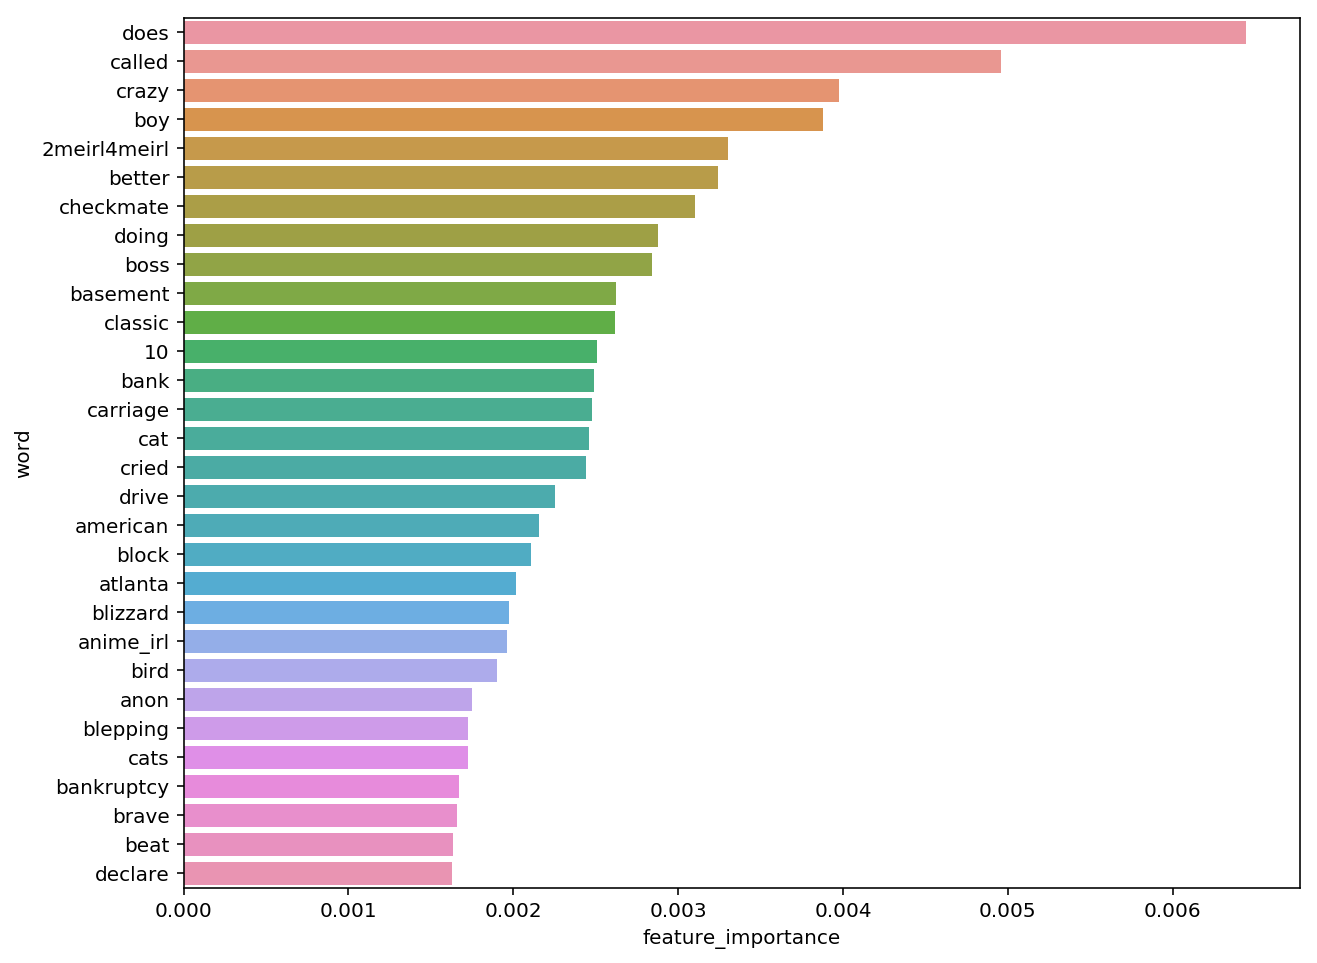

In [849]:
# A barplot of word and their importance to the thread going viral.
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=pr33['feature_importance'][0:30], y=pr33['word'][0:30], data=pr33,  ax=ax)

In [297]:
word_counts = train2_new2.sum()

In [298]:
word_counts[word_counts > 15]

just     23
time     21
pics     16
4       561
dtype: int64

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [858]:
## YOUR CODE HERE
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [859]:
test2_new2.head()  # testing data set

,000,10,100,1000,1100x1283,1280x720,13,1330,138,14,...,youseecomrade,youshouldknow,youtubehaiku,zelda,zoomies,0,1,2,3,4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [860]:
type(test2_new2)

pandas.core.frame.DataFrame

In [861]:
test2_new2.columns

Index([          '000',            '10',           '100',          '1000',
           '1100x1283',      '1280x720',            '13',          '1330',
                 '138',            '14',
       ...
       'youseecomrade', 'youshouldknow',  'youtubehaiku',         'zelda',
             'zoomies',               0,               1,               2,
                     3,               4],
      dtype='object', length=2130)

In [862]:
scores = cross_val_score(randt,test2_new2, y_testt, cv=5)
scores

array([ 0.5862069 ,  0.72413793,  0.60869565,  0.55652174,  0.66956522])

In [863]:
predictions = cross_val_predict(randt, test2_new2, y_testt, cv=5)  # Make cross-validated predictions with K=6


# Perform cross-validation
Mean_CV_R2 = np.mean(scores)
Std_CV_R2 = np.std(scores)


print(Mean_CV_R2)
print(Std_CV_R2)

0.629025487256
0.0603214291568


In [864]:
predictions[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [865]:
score = cross_val_score(randt,test2_new2, y_testt, cv=6)
score


prediction = cross_val_predict(randt, test2_new2, y_testt, cv=6)  # Make cross-validated predictions with K=6


# Perform cross-validation
Mean_CV_R02 = np.mean(score)
Std_CV_R02 = np.std(score)


print(Mean_CV_R02)
print(Std_CV_R02)

0.646602949599
0.0558020324853


In [866]:
prediction[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

#### Repeat the model-building process with a non-tree-based method.

In [867]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_union, make_pipeline, Pipeline
# train2_new2
# y_traint

#test2_new2
#y_testt

In [311]:
#ss = StandardScaler()
#Xs = ss.fit_transform(X)

In [868]:
rfc_pipe = make_pipeline(
        KNeighborsClassifier()
)

rfc_pipe.fit(train2_new2, y_traint)
rfc_pipe.score(test2_new2, y_testt)

0.65337954939341425

### Looking at the outcome of the KNeighbor Classifier which i have chossen for my process i can conclude that non-tree based methods are not best at classifying High or Low of a post because it's accuracy went further down close to the baseline prediction

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
df.head()

In [869]:
X = df['title'].apply(lambda x: x.lower())  # predictor(independent variable)
y = df.yes_no.values  # response varible(dependent variable)

In [870]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X,y, test_size=0.5 ) # A 50/50 train_test_split

In [871]:
# using pipe
rfc_pipe = make_pipeline(
    CountVectorizer(stop_words='english'),
    RandomForestClassifier(random_state=42)
)

rfc_pipe.fit(X_trains, y_trains)
rfc_pipe.score(X_tests, y_tests)

0.69324090121317161

In [872]:
cv = CountVectorizer(stop_words='english')  # using RFC to reevaluate my model since i could now predic and 
# know what feature performs the best

In [873]:
X_trains = pd.DataFrame(cv.fit_transform(X_trains).todense(), columns=cv.get_feature_names())
X_tests = pd.DataFrame(cv.transform(X_tests).todense(), columns=cv.get_feature_names())

In [874]:
ran = RandomForestClassifier(random_state=42)  # instanciating RandomForestClissifier model
ran.fit(X_trains, y_trains)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [875]:
best_features = ran.feature_importances_
best_features[0:5]

array([  8.04573672e-06,   4.50203245e-05,   1.36189829e-03,
         6.06951554e-04,   0.00000000e+00])

In [876]:
new_pred = ran.predict(X_tests)
new_pred[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [877]:
ran.score(X_tests, y_tests, sample_weight=None)

0.69324090121317161

In [878]:
# creating a dataframe of true observations, predictions and features
title_pred = pd.DataFrame(list(zip(cv.get_feature_names(), best_features, y_tests, new_pred)),
                         columns=['word','feature_importance','True_value', 'Prediction'])  

In [879]:
title_pred.head()

,word,feature_importance,True_value,Prediction
0,000,0.000008,1,1
1,10,0.000045,0,0
2,100,0.001362,1,0
3,1000k,0.000607,0,0
4,1020,0.000000,0,1


In [880]:
title_pred.sort_values(by=['feature_importance'], ascending=False).head() # top most performed features

,word,feature_importance,True_value,Prediction
183,basement,0.005949,0,0
207,biology,0.005144,1,1
318,checkmate,0.004773,0,0
287,case,0.003978,0,1
491,does,0.003897,1,1


In [881]:
title = title_pred.sort_values(by=['feature_importance'], ascending=False)

In [882]:
title.head(2)

,word,feature_importance,True_value,Prediction
183,basement,0.005949,0,0
207,biology,0.005144,1,1


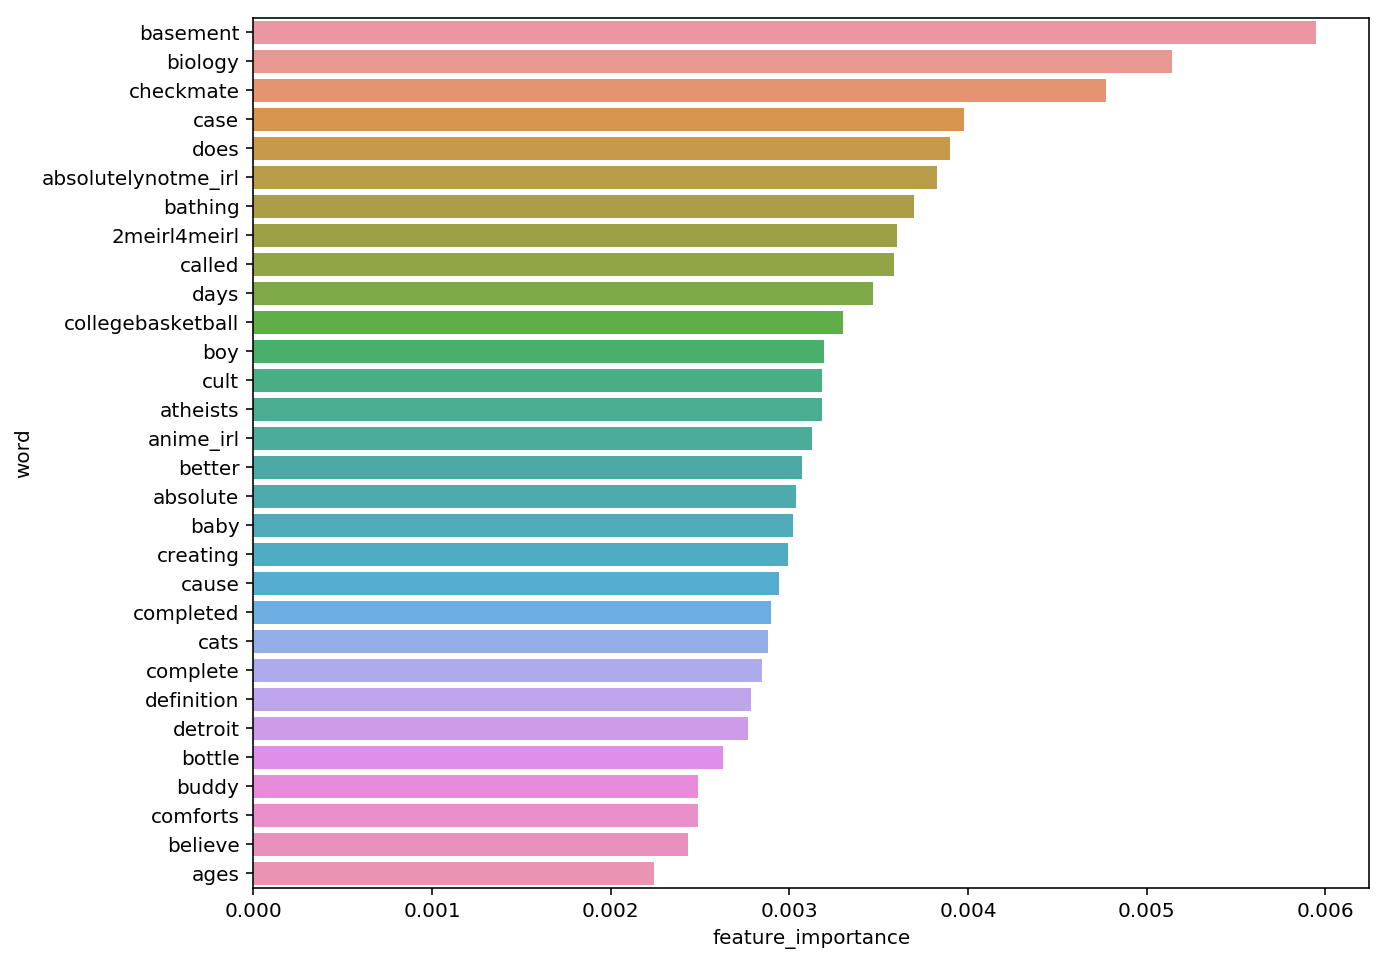

In [883]:
# A barplot of word and their importance to the thread going viral.
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=title['feature_importance'][0:30], y=title['word'][0:30], data=title,  ax=ax)

In [884]:
title_pred.True_value.value_counts()

1    291
0    286
Name: True_value, dtype: int64

In [885]:
title_pred.Prediction.value_counts()

0    347
1    230
Name: Prediction, dtype: int64

In [886]:
from sklearn.metrics import confusion_matrix

In [887]:
confusion_matrix(title_pred['Prediction'], title_pred['True_value'])

array([[228, 119],
       [ 58, 172]], dtype=int64)

In [888]:
pd.crosstab(title_pred['True_value'], title_pred['Prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,228,58,286
1,119,172,291
All,347,230,577


In [889]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 )  # using a 70/30 test/train_split

In [890]:
cvz = CountVectorizer(stop_words='english')
cvz.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [891]:
X_train = pd.DataFrame(cvz.transform(X_train).todense(), columns=cvz.get_feature_names())

X_test = pd.DataFrame(cvz.transform(X_test).todense(), columns=cvz.get_feature_names())

In [892]:
train_3 = RandomForestClassifier(random_state=42)  # instanciating RandomForestClissifier model
train_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [893]:
best_feat = train_3.feature_importances_
best_feat[0:5]

array([ 0.00225269,  0.        ,  0.00365111,  0.0009365 ,  0.00034599])

In [894]:
new_preds = train_3.predict(X_test)
new_preds[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [895]:
train_3.score(X_test, y_test, sample_weight=None)

0.69740634005763691

In [896]:
# creating a dataframe of true observations, predictions and features
train_3_pred = pd.DataFrame(list(zip(cvz.get_feature_names(), best_feat, y_test, new_preds)),
                         columns=['word','feature_importance','True_value', 'Prediction']) 

In [897]:
train_3_pred.head()

,word,feature_importance,True_value,Prediction
0,000,0.002253,0,0
1,10,0.000000,1,0
2,100,0.003651,0,0
3,1000,0.000937,0,0
4,1000k,0.000346,1,1


In [903]:
# Most performed features
train_3_pred.sort_values(by=['feature_importance'], ascending=False).head()

,word,feature_importance,True_value,Prediction
326,called,0.005488,0,1
118,age,0.004571,0,1
285,brave,0.004452,1,1
200,baby,0.003991,1,1
2,100,0.003651,0,0


In [904]:
train_3_pred.Prediction.value_counts()

1    241
0    106
Name: Prediction, dtype: int64

In [905]:
trt = train_3_pred.sort_values(by=['feature_importance'], ascending=False)

In [906]:
trt.head(2)

,word,feature_importance,True_value,Prediction
326,called,0.005488,0,1
118,age,0.004571,0,1


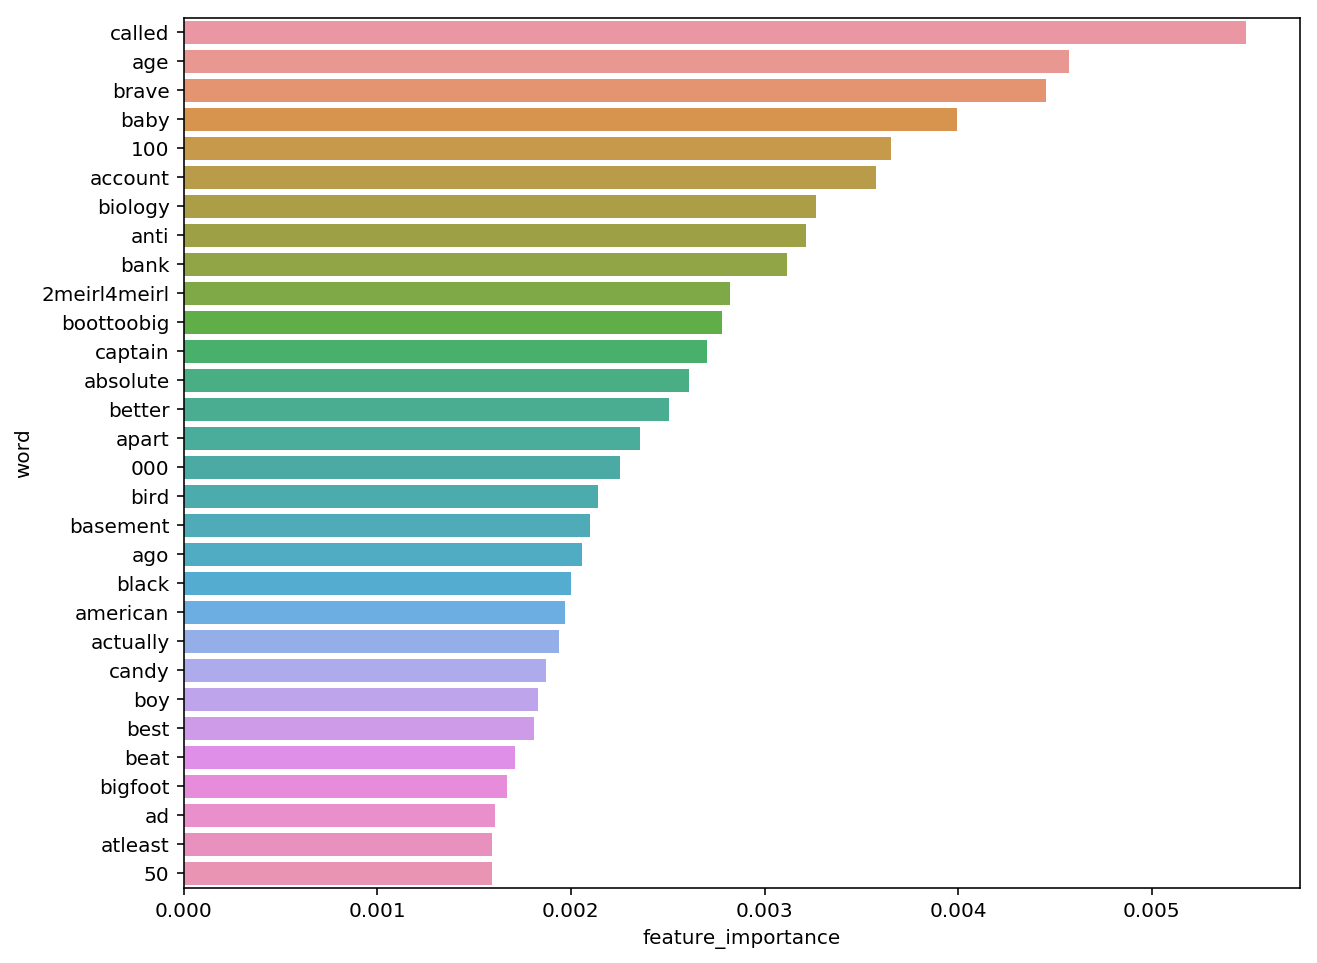

In [907]:
# A barplot of word and their importance to the thread going viral.
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=trt['feature_importance'][0:30], y=trt['word'][0:30], data=trt,  ax=ax)

In [902]:
pd.crosstab(train_3_pred['True_value'], train_3_pred['Prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,83,82,165
1,23,159,182
All,106,241,347


# Executive Summary
---
Put your executive summary in a Markdown cell below.

This report concludes that there several factors that are predictive of the overall interaction on a thread and some of those known factors are employed in this analysis.
The quality of a post title can often make or break the popularity of the submission. This post title classification model helps shed light on the types of wording and post structure that results in popular Reddit comments. The dataset was scraped from the [reddit.com](https://www.reddit.com/) which contains all reddit submissions (both posts and comments) from February 19, 2018 to February 22, 2018
A Random Forest Classifier for the Classification problems, made use of Pipeline and FeatureUnion for combining estimators which i think is useful beacuse there is a fixed sequence of processing my data, Also employed Cross-validatio to evaluate my estimator performance, To avoid overfitting. Also a Kneighbor Classifier at one instance was used just so as to see how a non decision tree based model performs resulted to a low accuracy which suggest that decision-tree-based mthods are best for this analysis.
After training our model on the training data then test our categorization model on the test data. The model acheived a training accuracy of 85% and a test accuracy of 67.6% and good at predicting "low" than "high".
Some subreddits with high featur importance are r/AskReddit, r/Atlanta, and r/aww. This is expected because these subreddits have tokens that unique to their posts. r/AskReddit is mostly a place to ask and answer thought-provoking questions and often contains the token ”?” at the end of a post. r/RussiaLago, Which is talking about Russia that actually makes sense considering what's going on in the political environement in the country.
In the case of using threads title to to know if a thread would go high or low viral, To understand why the threads with the most interactions averagaes between 19.5 to 7.3 comments per minute based on counts but some already got 16 to 108 comments per minute seem to show tendency of attracting more comments with time hence learning the contextual and syntactic structure was the obvous thing to do.

While the predictors in this analysis contributed to the classification of HIGH or LOW of a post thread title on reddit, I believe more data points should have been considered and i also believe that time a post was put out should also be a factor.
Future work should consider the incorporation of additional features such as using n-grams as inputs,
as well as using more sophisticated state-of-the-art language models help improve performance. Finally, hyperparameter tuning can also be optimized using Bayesian
methods, which is significantly better than the grid search method we used.



### BONUS
Refer to the README for the bonus parts

For Exhaustive Explanatory Of This Analysis Click [README](http://localhost:8890/notebooks/ReadMe.md_project_3.ipynb)